In [1]:
# MONTECARLO, CONFIDENCE INTERVAL, PDF, CLT

import random, pylab

In [2]:
pylab.rcParams['lines.linewidth'] = 4
pylab.rcParams['axes.titlesize'] = 20 
pylab.rcParams['axes.labelsize'] = 20
pylab.rcParams['xtick.labelsize'] = 16 
pylab.rcParams['ytick.labelsize'] = 16
pylab.rcParams['ytick.major.size'] = 7
pylab.rcParams['xtick.major.size'] = 7 
pylab.rcParams['legend.numpoints'] = 1

In [3]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = random.choice(self.pockets)
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'
    
fr = FairRoulette()
fr.spin()
print(fr.ball)
print(fr.betPocket(5,1))
        

15
-1


In [4]:
def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

In [5]:
random.seed(0)
game = FairRoulette()
for numSpins in range(100, 102):
    for i in range(3):
        playRoulette(game, numSpins,2,1,True)
        
for numSpins in range(1000000, 1000002):
    for i in range(3):
        playRoulette(game, numSpins,2,1,True)

100 spins of Fair Roulette
Expected return betting 2 = -100.0%

100 spins of Fair Roulette
Expected return betting 2 = 44.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

101 spins of Fair Roulette
Expected return betting 2 = -64.35643564356435%

101 spins of Fair Roulette
Expected return betting 2 = -28.712871287128714%

101 spins of Fair Roulette
Expected return betting 2 = 149.5049504950495%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.046%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.5984%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.7856%

1000001 spins of Fair Roulette
Expected return betting 2 = -0.4312995687004313%

1000001 spins of Fair Roulette
Expected return betting 2 = 0.4002995997004003%

1000001 spins of Fair Roulette
Expected return betting 2 = 0.6270993729006271%



In [6]:
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'
    
class AmRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'
            

In [7]:
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

In [8]:
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

In [9]:
random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (10, 100, 1000):
    print('\nSimulate betting a pocket for', numTrials, 'trials of', numSpins, 'spin each')
    for G in games:
        pocketReturns = findPocketReturn(G(), 20, numSpins, False)
        expReturn = 100*sum(pocketReturns)/len(pocketReturns)
        print('Exp. return for', G(), '=',str(round(expReturn, 4)) + '%')


Simulate betting a pocket for 20 trials of 10 spin each
Exp. return for Fair Roulette = -28.0%
Exp. return for European Roulette = -46.0%
Exp. return for American Roulette = 44.0%

Simulate betting a pocket for 20 trials of 100 spin each
Exp. return for Fair Roulette = 9.8%
Exp. return for European Roulette = 0.8%
Exp. return for American Roulette = -4.6%

Simulate betting a pocket for 20 trials of 1000 spin each
Exp. return for Fair Roulette = 4.58%
Exp. return for European Roulette = -1.9%
Exp. return for American Roulette = -6.94%


In [10]:
# Applying empirical rule
random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (100, 1000, 10000):
    print('\nSimulate betting a pocket for', numTrials,
        'trials of', numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), 20,
                                        numSpins, False)
        mean, std = getMeanAndStd(pocketReturns)
        resultDict[G().__str__()].append((numSpins,
                                        100*mean,
                                        100*std))
        print('Exp. return for', G(), '=',
             str(round(100*mean, 3))
             + '%,', '+/- ', str(round(100*1.96*std, 3))
             + '% with 95% confidence')


Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Roulette = 6.2%, +/-  152.114% with 95% confidence
Exp. return for European Roulette = -8.2%, +/-  90.567% with 95% confidence
Exp. return for American Roulette = 4.4%, +/-  99.537% with 95% confidence

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = 4.76%, +/-  36.995% with 95% confidence
Exp. return for European Roulette = -2.44%, +/-  34.125% with 95% confidence
Exp. return for American Roulette = -6.76%, +/-  41.378% with 95% confidence

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.45%, +/-  10.041% with 95% confidence
Exp. return for European Roulette = -3.952%, +/-  10.538% with 95% confidence
Exp. return for American Roulette = -3.34%, +/-  9.383% with 95% confidence


Fraction within -200 of mean = 0.9571469999999963
1000000
1000000


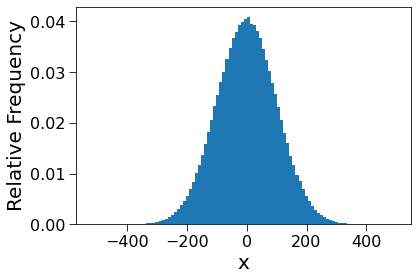

In [12]:
# Confidence Interval Part
# Probability Density Function (PDF)
random.seed(1)
dist, numSamples = [], 1000000

for i in range(numSamples):
    dist.append(random.gauss(0, 100))  #gauss Normal dist.
    
weights = [1/numSamples]*len(dist)
v = pylab.hist(dist, bins = 100,
              weights = [1/numSamples]*len(dist))
pylab.xlabel('x')
pylab.ylabel('Relative Frequency')

print('Fraction within -200 of mean =',
     sum(v[0][30:70]))       # probability %30 to %70


Text(0.5, 1.0, 'Normal Distribution, mu =0, sigma = 1')

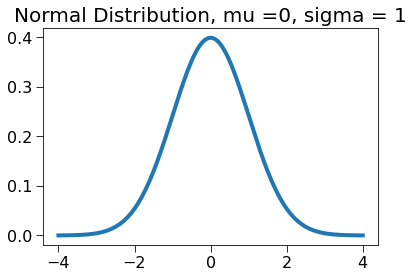

In [14]:
def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2
xVals, yVals = [], []
mu, sigma = 0, 1
x = -4
while x <= 4:
    xVals.append(x)
    yVals.append(gaussian(x, mu, sigma))
    x += 0.05
pylab.plot(xVals, yVals)
pylab.title('Normal Distribution, mu =' + str(mu)\
           + ', sigma = ' + str(sigma))

In [15]:
import scipy.integrate

In [16]:
def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =', mu, 'and sigma =', sigma)
        for numStd in (1, 1.96, 3):
            # integrate.quad(function, lowerLim, UpperLim, 
            #     tuple for interval)
            area = scipy.integrate.quad(gaussian,
                                       mu-numStd*sigma,
                                       mu+numStd*sigma,
                                       (mu,sigma))[0]
            print(' Fraction within', numStd,
                 'std =', round(area, 4))

In [18]:
checkEmpirical(3)

For mu = -10 and sigma = 5
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -2 and sigma = 4
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = 1 and sigma = 3
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973


Mean of rolling 1 dice = 2.497597436306403, Std = 1.4441377562719484
Mean of rolling 50 dice = 2.499565484967283, Std = 0.20365218691582812


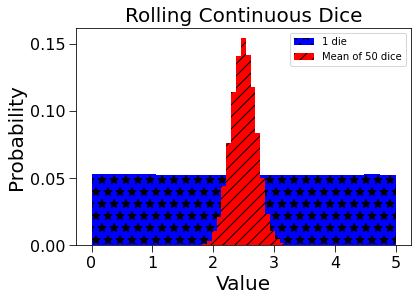

In [22]:
# Central Limit Theorem
# means very close to population mean
# variance very close to population variance
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random() 
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend,
               weights = [1/len(means)]*len(means),
               hatch = style)
    return getMeanAndStd(means)

mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 dice =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

In [33]:
# Buffon-Laplace method

def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 2*(inCircle/float(numNeedles))

In [34]:
import numpy

In [47]:
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = numpy.std(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) +\
          ', Std. dev. = ' + str(round(sDev, 6))\
          + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

In [48]:
def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst, sDev = getEst(numNeedles,
                              numTrials)
        numNeedles *= 2
    return 2*curEst

In [49]:
random.seed(0)
estPi(0.005, 100)

Est. = 1.5742200000000006, Std. dev. = 0.023943, Needles = 1000
Est. = 1.5695899999999994, Std. dev. = 0.017748, Needles = 2000
Est. = 1.5705399999999998, Std. dev. = 0.013565, Needles = 4000
Est. = 1.5707175, Std. dev. = 0.008402, Needles = 8000
Est. = 1.5706775, Std. dev. = 0.00685, Needles = 16000
Est. = 1.5706568750000003, Std. dev. = 0.004238, Needles = 32000
Est. = 1.5705859374999995, Std. dev. = 0.003514, Needles = 64000
Est. = 1.5707948437499997, Std. dev. = 0.002017, Needles = 128000


3.1415896874999993